In [1]:
from typing import Callable

import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from ucimlrepo import fetch_ucirepo

TARGET_VARIABLE = "Concrete compressive strength"


def plot_with_color_gradient(_data: pd.DataFrame, plot_function: Callable) -> None:
    data_sorted = _data.sort_values(by=TARGET_VARIABLE)
    _, ax = plt.subplots(figsize=(16, 10))

    plot_function(data_sorted, TARGET_VARIABLE, colormap="RdYlGn", ax=ax)
    sm = ScalarMappable(cmap="RdYlGn")
    sm.set_array(data_sorted[TARGET_VARIABLE])
    _cbar = plt.colorbar(sm, label=TARGET_VARIABLE, ax=ax)
    _cbar.set_label(TARGET_VARIABLE, fontsize=12)

    plt.legend().remove()


def plot_with_categories(_data: pd.DataFrame, plot_function: Callable) -> None:
    data_sorted = _data.sort_values(by=TARGET_VARIABLE)
    _, ax = plt.subplots(figsize=(16, 10))

    std = _data[TARGET_VARIABLE].std()

    data_sorted["Strength Category"] = pd.cut(
        data_sorted[TARGET_VARIABLE],
        bins=[-float("inf"), -std, std, float("inf")],
        labels=["Low", "Mid", "High"]
    )

    plot_function(
        data_sorted.drop([TARGET_VARIABLE], axis=1),
        "Strength Category", colormap="RdYlGn", ax=ax
    )

In [2]:
concrete_compressive_strength = fetch_ucirepo(id=165)
concrete_compressive_strength.variables

,name,role,type,demographic,description,units,missing_values
0,Cement,Feature,Continuous,None,None,kg/m^3,no
1,Blast Furnace Slag,Feature,Integer,None,None,kg/m^3,no
2,Fly Ash,Feature,Continuous,None,None,kg/m^3,no
3,Water,Feature,Continuous,None,None,kg/m^3,no
4,Superplasticizer,Feature,Continuous,None,None,kg/m^3,no
5,Coarse Aggregate,Feature,Continuous,None,None,kg/m^3,no
6,Fine Aggregate,Feature,Continuous,None,None,kg/m^3,no
7,Age,Feature,Integer,None,None,day,no
8,Concrete compressive strength,Target,Continuous,None,None,MPa,no


In [3]:
features = concrete_compressive_strength.data.features
targets = concrete_compressive_strength.data.targets
data = pd.concat([features, targets], axis=1)
data.describe().round(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


In [4]:
norm_data = (data - data.mean()) / data.std()
norm_data.describe().round(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.71,-0.86,-0.85,-2.80,-1.04,-2.21,-2.24,-0.71,-2.00
25%,-0.85,-0.86,-0.85,-0.78,-1.04,-0.53,-0.53,-0.61,-0.72
50%,-0.08,-0.60,-0.85,0.16,0.03,-0.06,0.07,-0.28,-0.08
75%,0.66,0.80,1.00,0.49,0.67,0.73,0.63,0.16,0.62
max,2.48,3.31,2.28,3.06,4.35,2.21,2.73,5.06,2.80


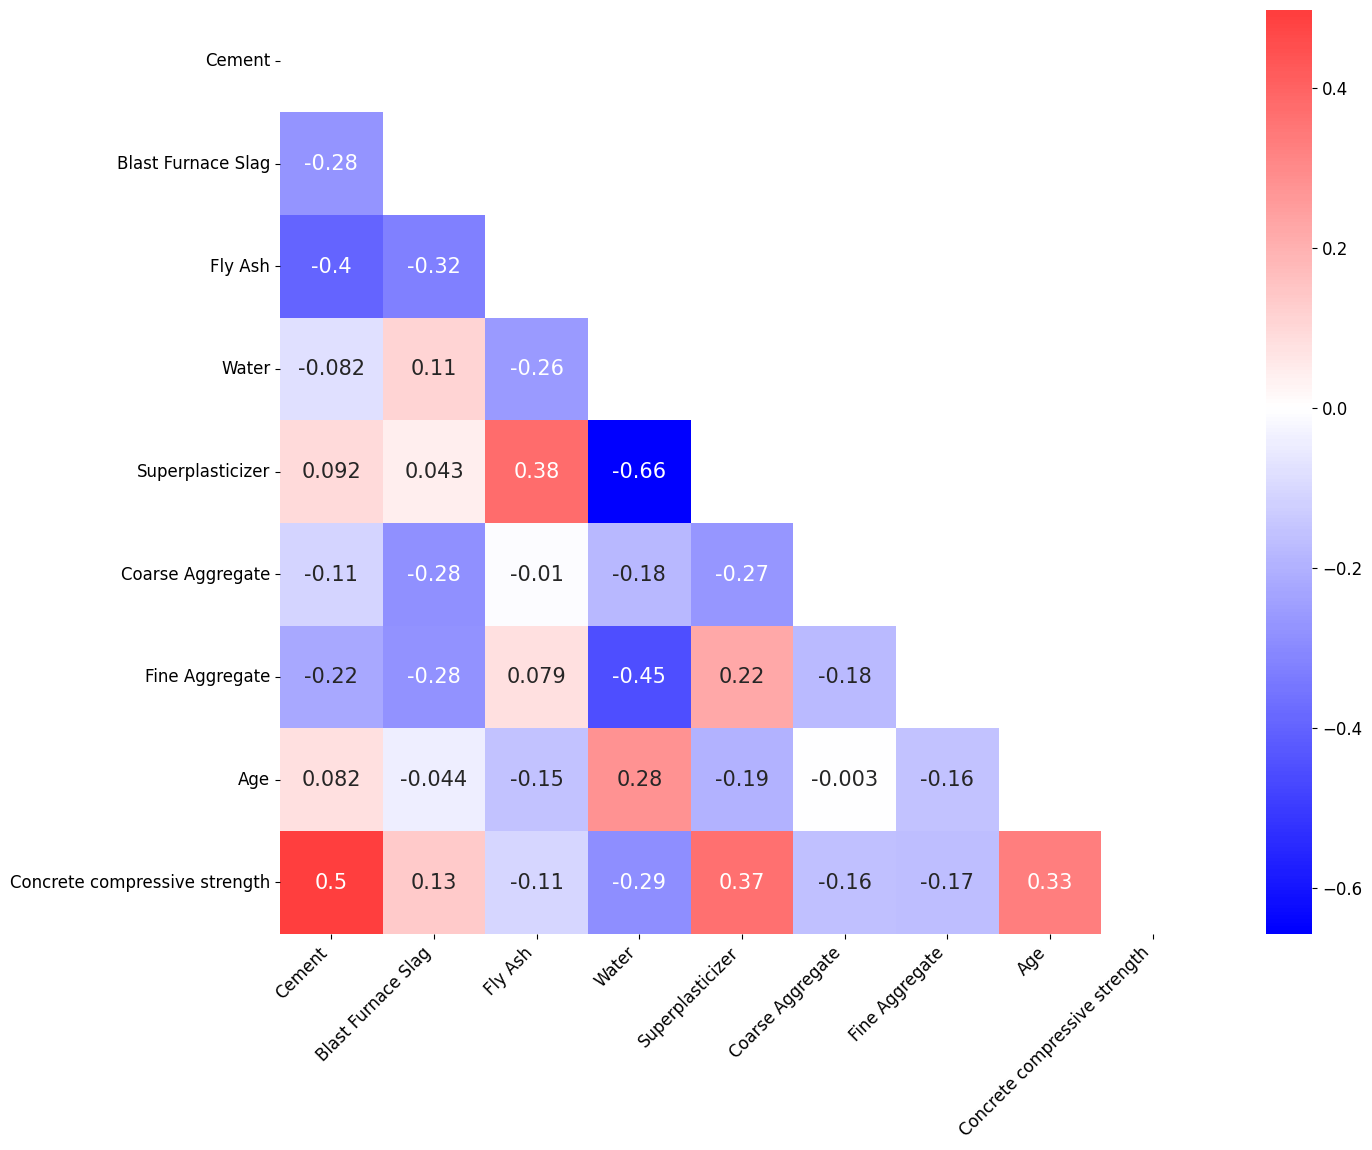

In [5]:
corr_matrix = data.corr()
plt.figure(figsize=(16, 12))
heatmap = seaborn.heatmap(
    corr_matrix,
    mask=np.triu(corr_matrix),
    annot=True,
    cmap="bwr",
    center=0,
    square=True,
    annot_kws={"size": 15},
)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=12);

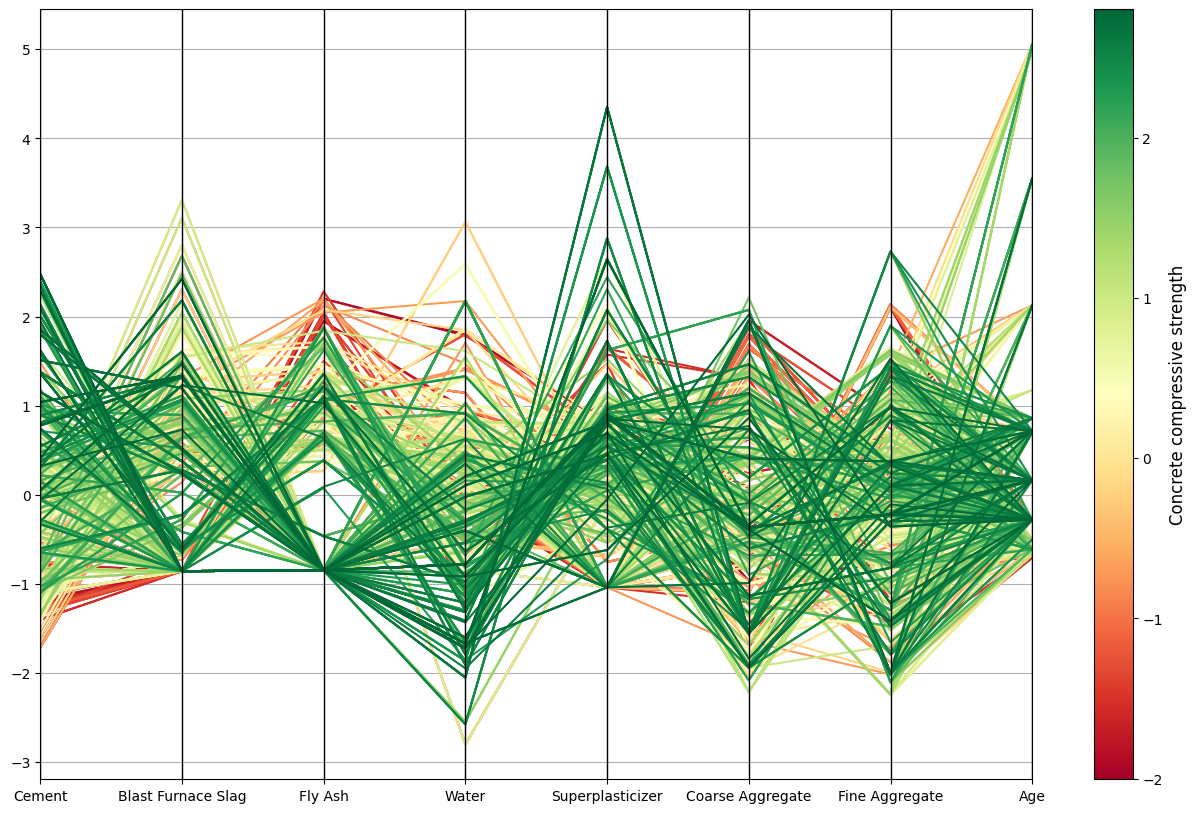

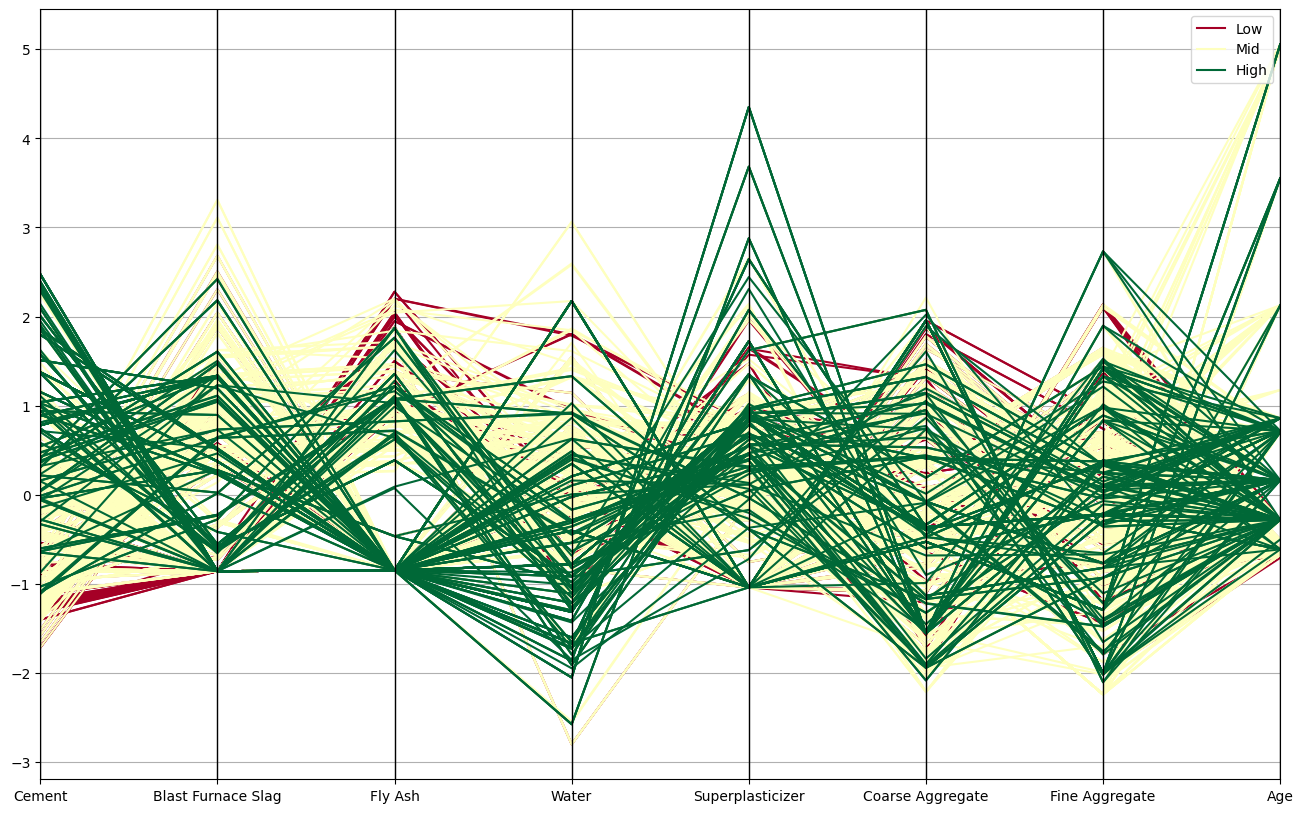

In [6]:
plot_with_color_gradient(norm_data, pd.plotting.parallel_coordinates)
plot_with_categories(norm_data, pd.plotting.parallel_coordinates)

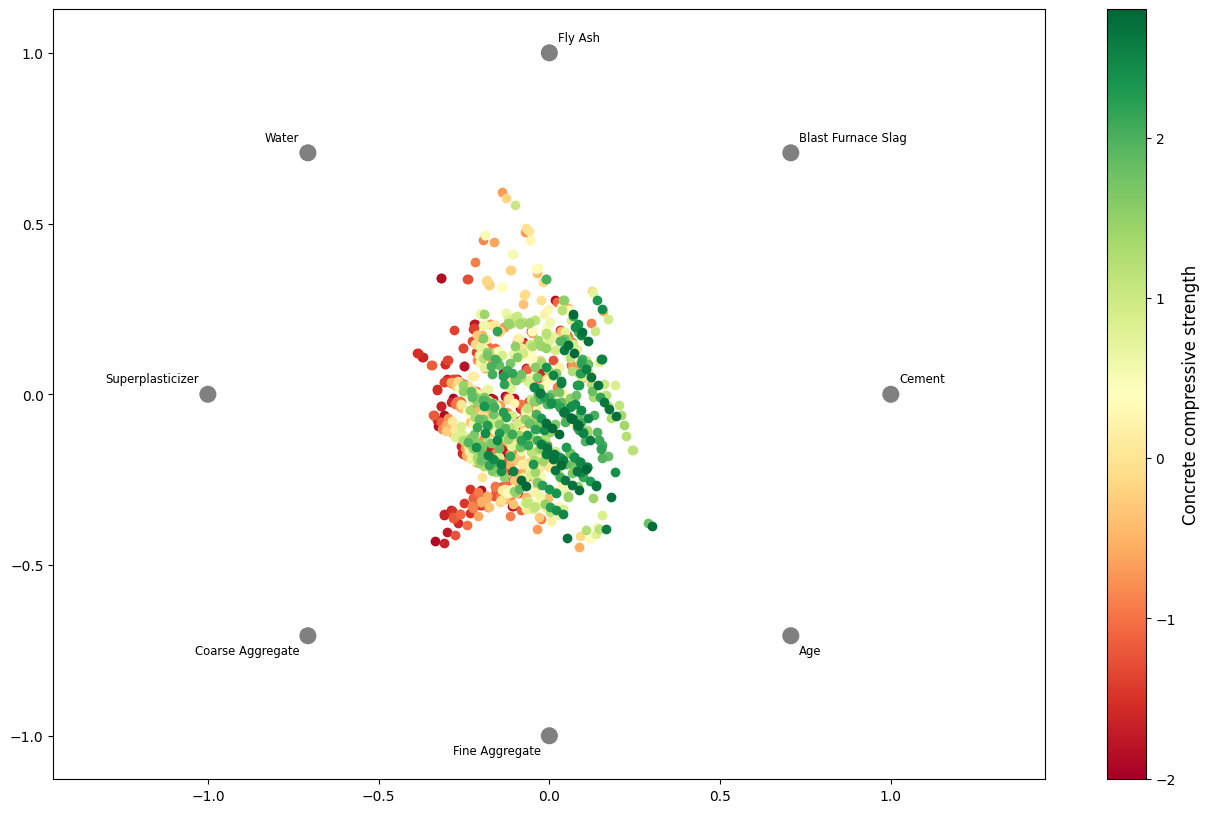

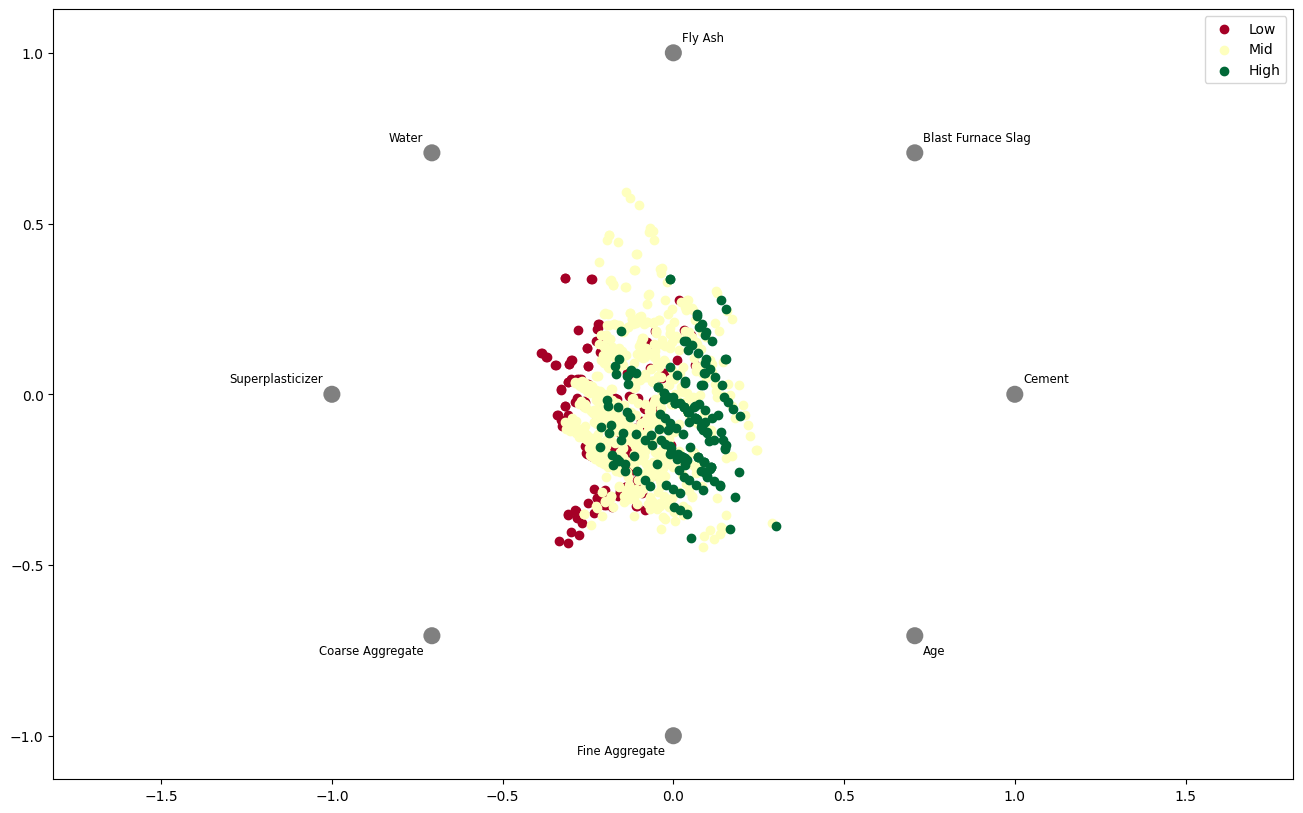

In [7]:
plot_with_color_gradient(norm_data, pd.plotting.radviz)
plot_with_categories(norm_data, pd.plotting.radviz)

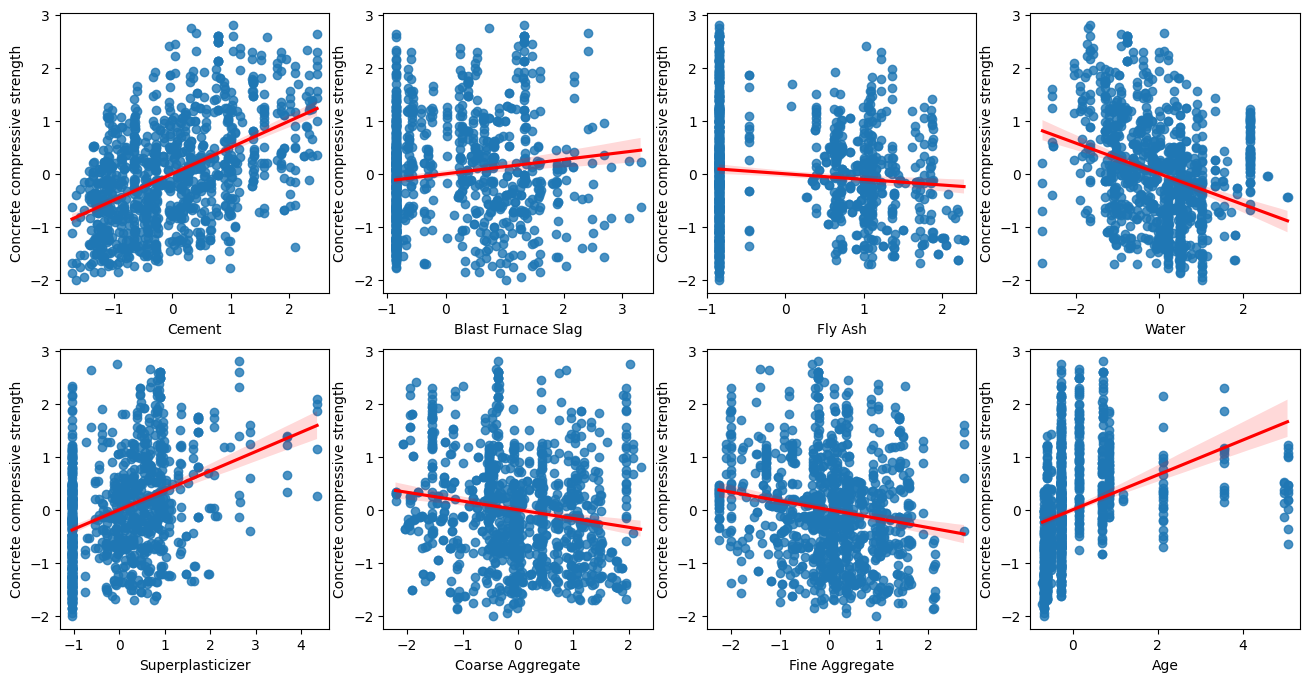

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(norm_data.columns[:-1]):
    seaborn.regplot(x=column, y=TARGET_VARIABLE, data=norm_data, ax=axes[i], line_kws={"color": "red"})

plt.show()